<img src="https://github.com/DahyannAraya/climada_copernicus_seasonal_forecast_workshop/blob/main/images/Logos.png?raw=1" title="Institutional Logos" width="70%">

## Copernicus Seasonal Forecast Module

This module is developed to manage seasonal forecast data from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu) (CDS) for the [U-CLIMADAPT project](https://www.copernicus-user-uptake.eu/user-uptake/details/responding-to-the-impact-of-climate-change-u-climadapt-488).
It offers comprehensive tools for downloading, processing, computing climate indices, and generating hazard objects based on seasonal forecast datasets, particularly [Seasonal forecast daily and subdaily data on single levels](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).
The module is tailored to integrate seamlessly with the [CLIMADA](https://climada.ethz.ch/)(CLIMate ADAptation) platform, supporting climate risk assessment and the development of effective adaptation strategies.

Features:
- Download seasonal forecast data from CDS
- Process raw data into climate indices
- Calculate various heat-related indices (e.g., Maximum Temperature, Tropical Nights)
- Create CLIMADA Hazard objects for further risk analysis
- Visualize hazard data

Prerequisites:

1. CDS account and API key:
   Register at https://cds.climate.copernicus.eu

2. CDS API client installation:
   pip install cdsapi

3. CDS API configuration:
   Create a .cdsapirc file in your home directory with your API key and URL.
   For instructions, visit: https://cds.climate.copernicus.eu/how-to-api#install-the-cds-api-client

4. Dataset Terms and Conditions: After selecting the dataset to download, make
   sure to accept the terms and conditions on the corresponding dataset webpage in the CDS portal before running this notebook. Here, https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download.

Usage:
This module is typically imported and used within larger scripts or applications for climate data processing
and risk assessment. See individual function docstrings for specific usage instructions.

**Note**:
Ensure you have the **necessary permissions** and comply with the CDS data usage policies when using this module. You can view the terms and conditions at https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=download. You can find them at the bottom of the download page.

### Setup and Installation (Google Colab Only)

This section installs and configures all necessary dependencies for running the seasonal forecast module in Google Colab. If you are running this notebook locally, you should install these dependencies manually in your environment instead.
Installed Dependencies:

    - cdsapi: For accessing the Copernicus Climate Data Store (CDS)
    - climada and climada-petals: For climate impact analysis
    - The seasonal forecast module: For processing and analyzing seasonal forecasts



#### Install Copernicus Climate Data Store (CDS) API

In [ ]:
# Configure Copernicus API credentials (FOR DEMONSTRATION ONLY)
# ⚠️ This API key is temporary and will not be available after this session.
# If you already have your own CDS key, replace it and use it here.
# To access data from the Copernicus Climate Data Store (CDS), you must use your personal API key.
# Register at https://cds.climate.copernicus.eu and follow the setup instructions to obtain your key.

url = 'url: https://cds.climate.copernicus.eu/api'
key = 'key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api
key: 5df55c41-98f3-4e60-b751-9c8cd43e90c7


In [ ]:
!pip install "cdsapi>=0.7.4"

In [ ]:
import cdsapi
c = cdsapi.Client(debug=True)

2025-03-21 14:18:23,709 DEBUG GET https://cds.climate.copernicus.eu/api/catalogue/v1/messages
DEBUG:datapi.legacy_api_client:GET https://cds.climate.copernicus.eu/api/catalogue/v1/messages
2025-03-21 14:18:24,412 DEBUG REPLY {"messages":[{"id":"sites/cds/2024/2024-03-01-production-keycloak.md","date":"2024-09-26T00:00:00","summary":null,"url":null,"severity":"info","content":"Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.","live":true},{"id":"sites/cds/2024/2024-06-17-beta-warning1.md","date":"2024-06-16T00:00:00","summary":null,"url":null,"severity":"warning","content":"CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the \"Show API request code\" tool on the dataset Download Form to check you are using the correct syntax for your API request.","live":true}]}
DEBUG:datapi.legacy_api_client:REPLY {"messages":[{"id":"sites/cds/2024/2024-03-01-production-keycloak.md","d

In [ ]:
import cdsapi

client = cdsapi.Client()

dataset = 'reanalysis-era5-pressure-levels'
request = {
  'product_type': ['reanalysis'],
  'variable': ['geopotential'],
  'year': ['2024'],
  'month': ['03'],
  'day': ['01'],
  'time': ['13:00'],
  'pressure_level': ['1000'],
  'data_format': 'grib',
}
target = 'download.grib'

client.retrieve(dataset, request, target)

2025-03-21 14:18:25,119 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-21 14:18:25,121 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-03-21 14:18:25,910 INFO Request ID is 38c83c02-4290-423b-b883-0cf89ec60de9
INFO:datapi.legacy_api_client:Request ID is 38c83c02-4290-423b-b883-0cf89ec60de9
2025-03-21 14:18:27,127 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-03-21 14:18:30,192 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

78cf4326bae1c78bb7394803a5713ae3.grib:   0%|          | 0.00/1.98M [00:00<?, ?B/s]

'download.grib'

#### Install CLIMADA

In [ ]:
!git clone https://github.com/CLIMADA-project/climada_python.git

Cloning into 'climada_python'...
remote: Enumerating objects: 35923, done.
remote: Counting objects: 100% (1690/1690), done.
remote: Compressing objects: 100% (639/639), done.
remote: Total 35923 (delta 1328), reused 1130 (delta 1049), pack-reused 34233 (from 4)
Receiving objects: 100% (35923/35923), 199.30 MiB | 22.33 MiB/s, done.
Resolving deltas: 100% (26797/26797), done.


In [ ]:
%cd climada_python

/content/climada_python


In [ ]:
!pip install -e .

Obtaining file:///content/climada_python
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 38.6 MB/s eta 0:00:0

#### Install the Copernicus Forecast module from the CLIMADA Petals repository

In [ ]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 785.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.3 MB/s eta 0:00:00


In [ ]:
import climada

# A simple example to test functionality
from climada.entity import Exposures
from climada.hazard import Hazard

In [ ]:
!git clone https://github.com/CLIMADA-project/climada_petals.git

Cloning into 'climada_petals'...
remote: Enumerating objects: 31808, done.
remote: Counting objects: 100% (5800/5800), done.
remote: Compressing objects: 100% (1007/1007), done.
remote: Total 31808 (delta 5375), reused 4829 (delta 4793), pack-reused 26008 (from 2)
Receiving objects: 100% (31808/31808), 174.31 MiB | 18.40 MiB/s, done.
Resolving deltas: 100% (23660/23660), done.


In [ ]:
%cd climada_petals

/content/climada_python/climada_petals


In [ ]:
!pip install -e .

Obtaining file:///content/climada_python/climada_petals
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.

In [ ]:
import climada

# A simple example to test functionality
from climada.entity import Exposures
from climada.hazard import Hazard

In [ ]:
!pip install git+https://github.com/CLIMADA-project/climada_petals.git@feature/copernicus_forecast

  Cloning https://github.com/CLIMADA-project/climada_petals.git (to revision feature/copernicus_forecast) to /tmp/pip-req-build-o7eeebxd
  Running command git clone --filter=blob:none --quiet https://github.com/CLIMADA-project/climada_petals.git /tmp/pip-req-build-o7eeebxd
  Running command git checkout -b feature/copernicus_forecast --track origin/feature/copernicus_forecast
  Switched to a new branch 'feature/copernicus_forecast'
  Branch 'feature/copernicus_forecast' set up to track remote branch 'feature/copernicus_forecast' from 'origin'.
  Resolved https://github.com/CLIMADA-project/climada_petals.git to commit 95d435ba59ad9bd9251b909861a0b4efeb6925f9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for climada_petals: filename=climada_petals-6.0.2.dev0-py3-none-any.whl size=5351769 sha256=cc28d3a88cca11ee7ad2b412ae1f5a7d5054b78f9ed2b78e

In [ ]:
!git branch


* main


In [ ]:
!git checkout feature/copernicus_forecast

Branch 'feature/copernicus_forecast' set up to track remote branch 'feature/copernicus_forecast' from 'origin'.
Switched to a new branch 'feature/copernicus_forecast'


In [ ]:
# Import packages
import climada

import warnings
import datetime as dt
warnings.filterwarnings('ignore')

from climada.hazard import Hazard
from climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard import SeasonalForecast
from climada_petals.hazard.copernicus_interface.time_utils import month_name_to_number
from climada.util.coordinates import (
    bounding_box_from_cardinal_bounds, bounding_box_global, bounding_box_from_countries
    )

### Set up module parameters

To configure the module for working with Copernicus forecast data and converting it into a hazard object for CLIMADA, you will need to define several essential parameters. These settings are crucial as they specify the type of data to be retrieved, the format, the forecast period, and the geographical area of interest. These parameters influence how the forecast data is processed and transformed into a hazard object.

Below, we outline these parameters and use an example for the "Maximum Temperature" index to demonstrate the seasonal forecast functionality.

To learn more about what these parameters entail and their significance, please refer to the [documentation on the CDS webpage](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=overview).

#### Overview of parameters

**index_metric**: Defines the type of index to be calculated. The current options available are 'HIA' (Heat Index Adjusted), 'HIS' (Heat Index Simplified), 'Tmean' (Mean Temperature), 'Tmin' (Minimum Temperature), 'Tmax' (Maximum Temperature), 'HW' (Heat Wave), 'TR' (Tropical Nights), 'TX30' (Hot Days), 'HUM' (Humidex), 'RH' (Relative Humidity), 'AT' (Apparent Temperature), and 'WBGT' (Wet Bulb Globe Temperature (Simple)).

  - **Heat Waves ("HW")**:  
    If `index_metric` is set to 'HW' for heat wave calculations, additional parameters can be specified to fine-tune the heat wave detection:

    - **threshold**: Temperature threshold above which days are considered part of a heat wave. Default is 27°C.
    - **min_duration**: Minimum number of consecutive days above the threshold required to define a heat wave event. Default is 3 days.
    - **max_gap**: Maximum allowable gap (in days) between two heat wave events to consider them as one single event. Default is 0 days.

  - **Tropical Nights ("TR")**:  
    If `index_metric` is set to 'TR' for tropical nights, an additional parameter can be specified to set the threshold:

    - **threshold**: Nighttime temperature threshold, above which a night is considered "tropical." Default is 20°C.



**format** : Specifies the format of the data to be downloaded, "grib" or "netcdf". Copernicus do **NOT** recommended netcdf format for operational workflows since conversion to netcdf is considered experimental. [More information here](https://confluence.ecmwf.int/display/CKB/GRIB+to+netCDF+conversion+on+new+CDS+and+ADS+systems).

**originating_centre**: Identifies the source of the data. A standard choice is "dwd" (German Weather Service), one of eight providers including ECMWF, UK Met Office, Météo France, CMCC, NCEP, JMA, and ECCC.

**system**: Refers to a specific model or configuration used for forecasts. In this script, the default value is "21," which corresponds to the GCSF (German Climate Forecast System) [version 2.1](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020MS002101). More details can be found in the [CDS documentation](https://cds.climate.copernicus.eu/datasets/seasonal-original-single-levels?tab=documentation).

**year_list**: A list of years for which data should be downloaded and processed.

**initiation_month**: A list of the months in which the forecasts are initiated. Example: ["March", "April"].

**forecast_period**: Specifies the months relative to the forecast's initiation month for which the data is forecasted. Example: ["June", "July", "August"] indicates forecasts for these months. The maximum available is 7 months.

  - **⚠️ Important**: When an initiation month is in one year and the forecast period in the next, the system recognizes the forecast extends beyond the initial year. Data is retrieved based on the initiation month, with lead times covering the following year. The forecast is stored under the initiation year’s directory, ensuring consistency while spanning both years.

**area_selection**: This determines the geographical area for which the data should be downloaded. It can be set to
- "global" (gobal data is downloaded)
- a list of four numbers corresponding to the geographical bounds (in degrees; EPSG:4326), specified as [north, west, south, east].
- a list of ISO alpha-3 codes for different countries, e.g., ["DEU", "CHE"] for Germany and Switzerland. See this [wikipedia page](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) for the country codes. Note that the **joint region** will be downloaded and processed, i.e., handling data for ["DEU", "CHE"] and then for ["CHE"] will download and generate two sets of data.

**overwrite**: Boolean flag that, when set to True, forces the system to redownload and reprocess existing files.

In [ ]:
# We define above parameters for an example
index_metric = "TX30"
data_format = "grib"  # 'grib' or 'netcdf'
originating_centre =  "dwd"
system =  "21"
forecast_period = ["Jun", "August"] # from jun to august including july
year_list = [2023]
initiation_month = [ "March","April","May"]
overwrite = False

# global bounding box
# bounds = bounding_box_global()
# input cardinal bounds
# bounds = bounding_box_from_cardinal_bounds(northern=49, eastern=20, southern=40, western=10)
# input country ISO codes
bounds = bounding_box_from_countries(["CHE"])

# Parameters for Heat Waves
hw_threshold = 27
hw_min_duration = 3
hw_max_gap = 0

# Parameters for Tropical Nights
threshold_tr = 20

# Describe the selected climate index and the associated input data
handler = SeasonalForecast(
    index_metric=index_metric,
    year_list=year_list,
    forecast_period=forecast_period,
    initiation_month=initiation_month,
    bounds=bounds,
    data_format=data_format,
    originating_centre=originating_centre,
    system=system,
    )

handler.explain_index()

'Explanation for TX30: Hot Days (TX30): Counts days with maximum temperature exceeding 30°C. \nRequired variables: 2m_temperature'

### Download and Process Data

The `handler.download_and_process_data` method in CLIMADA efficiently retrieves and organizes Copernicus forecast data. It checks for existing files to avoid redundant downloads, stores data by format (grib or netCDF), year, month. Then the files are processed for further analysis, such as calculating climate indices or creating hazard objects within CLIMADA. Here are the aspects of this process:

- **Data Download**: The method downloads the forecast data for the selected years, months, and regions. The data is retrieved in **grib** or **netCDF** formats, which are commonly used for storing meteorological data. If the required files already exist in the specified directories, the system will skip downloading them, as indicated by the log messages such as:  
  *"Corresponding grib file SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib already exists."* 


- **Data Processing**: After downloading (or confirming the existence of) the files, the system converts them into daily **netCDF** files. Each file contains gridded, multi-ensemble data for daily mean, maximum, and minimum, structured by forecast step, ensemble member, latitude, and longitude. The log messages confirm the existence or creation of these files, for example:  
  *"Daily file SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/processed_data/TX30_boundsW4_S44_E11_N48.nc already exists."*

- **Geographic and Temporal Focus**: The files are generated for a specific time frame (e.g., June and July 2022) and a predefined geographic region, as specified by the parameters such as `bounds`, `month_list`, and `year_list`. This ensures that only the selected data for your analysis is downloaded and processed.

- **Data Completeness**: Messages like "already exists" ensure that you do not redundantly download or process data, saving time and computing resources. However, if the data files are missing, they will be downloaded and processed as necessary.

In [ ]:
# Download and process data
handler.download_and_process_data()

2025-03-21 14:21:09,489 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-21 14:21:09,491 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-03-21 14:21:11,167 INFO Request ID is 2d145271-0461-4d0b-9b22-a408ed05fe36
INFO:datapi.legacy_api_client:Request ID is 2d145271-0461-4d0b-9b22-a408ed05fe36
2025-03-21 14:21:11,421 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-03-21 14:21:20,584 INFO status has been updated to successful
INFO:datapi.legacy_api_client:status has been 

da7737a0c7633370dc9afe85bf87365a.grib:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

2025-03-21 14:21:24,829 - climada_petals.hazard.copernicus_interface.downloader - INFO - File successfully downloaded to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib.


2025-03-21 14:21:25,504 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-21 14:21:25,506 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-03-21 14:21:27,180 INFO Request ID is 668e9a4b-580e-40fa-8cb5-8534dc97fe6a
INFO:datapi.legacy_api_client:Request ID is 668e9a4b-580e-40fa-8cb5-8534dc97fe6a
2025-03-21 14:21:27,420 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-03-21 14:21:32,912 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

2a252b64f1f13df5ce4a51581b4cda1a.grib:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

2025-03-21 14:21:41,358 - climada_petals.hazard.copernicus_interface.downloader - INFO - File successfully downloaded to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib.


2025-03-21 14:21:47,042 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-03-21 14:21:47,044 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-03-21 14:21:48,784 INFO Request ID is 49a21eab-e7f6-419c-8e2a-b6f63505e148
INFO:datapi.legacy_api_client:Request ID is 49a21eab-e7f6-419c-8e2a-b6f63505e148
2025-03-21 14:21:49,027 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-03-21 14:21:54,629 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

dd8fb9bf71c8b88717662a43e85cae9a.grib:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

2025-03-21 14:22:02,125 - climada_petals.hazard.copernicus_interface.downloader - INFO - File successfully downloaded to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib.
2025-03-21 14:23:01,132 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Daily file saved to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/processed_data/TX30_boundsW4_S44_E11_N48.nc
2025-03-21 14:23:55,640 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Daily file saved to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/processed_data/TX30_boundsW4_S44_E11_N48.nc
2025-03-21 14:24:49,884 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Daily file saved to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/

{'downloaded_data': {'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib'),
  '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib'),
  '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/downloaded_data/grib/TX30_boundsW4_S44_E11_N48.grib')},
 'processed_data': {'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/processed_data/TX30_boundsW4_S44_E11_N48.nc'),
  '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/processed_data/TX30_boundsW4_S44_E11_N48.nc'),
  '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data

### Calculate Climate Indices

When you use the `handler.calculate_index` method in CLIMADA to compute specific climate indices (such as Maximum Temperature), the generated output is saved and organized in a structured format for further analysis. Here some details:

- **Index Calculation**: The method processes seasonal forecast data to compute the selected index for the chosen years, months, and regions. This index represents a specific climate condition, such as the number of Maximum Temperature ("Tmax") over the forecast period, as defined in the parameters.

- **Data Storage**: The calculated index data is saved in **netCDF** format. These files are automatically saved in directories specific to the index and time period. The file paths are printed below the processing steps. For example, the computed index values are stored in:  
  *"SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_daily.nc"*. 

  Similarly, the statistics of the index (e.g., mean, max, min, std) are saved in:  
  *"SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_stats.nc"*. 
  These files ensure that both the raw indices and their statistical summaries are available for detailed analysis.
  
  Each file contains data for a specific month and geographic region, as defined in the parameters. This allows you to analyze how the selected climate index varies over time and across different locations.

- **Completeness of Data Processing**: Messages 'Index Tmax successfully calculated and saved for...' confirm the successful calculation and storage of the index, ensuring that all requested data has been processed and saved correctly.


In [ ]:
# Calculate index
handler.calculate_index(hw_threshold=hw_threshold, hw_min_duration=hw_min_duration, hw_max_gap=hw_max_gap)

2025-03-21 14:24:49,900 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Processing index TX30 for year 2023, initiation month 03.
2025-03-21 14:25:01,677 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Saved daily index to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_daily.nc
2025-03-21 14:25:01,688 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Saved monthly index to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc
2025-03-21 14:25:01,705 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Saved stats index to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_stats.nc
2025-03-21 14:25:01,712 - clim

{'2023_init03_valid06_08': {'daily': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_daily.nc'),
  'monthly': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc'),
  'stats': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_stats.nc')},
 '2023_init04_valid06_08': {'daily': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_daily.nc'),
  'monthly': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsW4_S44_E11_N48_monthly.nc'),
  'stats': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/indices/TX30/TX30_boundsW4_S44

### Calculate a Hazard Object

When you use the `handler.process_and_save_hazards` method in CLIMADA to convert processed index from Copernicus forecast data into a hazard object:

- **Hazard Object Creation**: The method processes seasonal forecast data for specified years and months, converting these into hazard objects. These objects encapsulate potential risks associated with specific weather events or conditions, such as Maximum Temperature ('Tmax') indicated in the parameters, over the forecast period.

- **Data Storage**: The hazard data for each ensemble member of the forecast is saved as HDF5 files. These files are automatically stored in specific directories corresponding to each month and type of hazard. The file paths are printed below the processing steps. For example, *"/SYSTEM_DIR/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5"*.
 HDF5 is a versatile data model that efficiently stores large volumes of complex data.
 
 Each file is specific to a particular month and hazard scenario ('Tmax' in this case) and covers all ensemble members for that forecast period, aiding in detailed risk analysis.

- **Completeness of Data Processing**: Messages like 'Completed processing for 2022-07. Data saved in...' confirm the successful processing and storage of the hazard data for that period, ensuring that all requested data has been properly handled and stored.

#### Visualizing the Calculated Hazard Object

Once the hazard object has been successfully calculated, the last element created is printed for visualization. This is important for several reasons:

- **Initial Data Inspection**: The visualization allows you to view a slice of the forecast data, providing a quick check of the results. This initial glimpse helps you verify that the data processing was successful and provides insights into the distribution of the hazard (in this case, Maximum Temperature) across the area of interest.

- **Geographic Accuracy**: The map helps you verify if the correct geographic region was processed and plotted. This is particularly useful as it allows immediate feedback on whether the user-defined boundaries or selected areas (e.g., Germany and Switzerland) were captured correctly.

- **Data Quality Check**: Visualizing the output also serves as a preliminary quality check, allowing you to detect any unexpected results or anomalies in the data. For instance, the color bar indicating the "Intensity (days)" gives an indication of how the hazard index is distributed across the mapped area.

- **Quick Workflow Testing**: This step is essential for testing the entire workflow, ensuring that the process is working as expected from data download, processing, and hazard object creation to visualization.

This output provides a structured dataset ready for further analysis within the CLIMADA framework, allowing for the evaluation of potential impacts and the planning of mitigation strategies. 

In [ ]:
handler.save_index_to_hazard()

2025-03-21 14:25:24,432 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Creating hazard for index TX30 for year 2023, initiation month 03.
2025-03-21 14:25:25,382 - climada.hazard.io - INFO - Writing /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5
2025-03-21 14:25:25,419 - climada.hazard.centroids.centr - INFO - Writing /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5
2025-03-21 14:25:25,899 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Hazard file saved to /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5
2025-03-21 14:25:25,901 - climada_petals.hazard.copernicus_interface.create_seasonal_forecast_hazard - INFO - Creating hazard for index TX30 for year 2023, initiation 

{'2023_init03_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5'),
 '2023_init04_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init04/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5'),
 '2023_init05_valid06_08': PosixPath('/root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init05/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5')}

## Example for reading and plotting hazard

The saved hazard file can then be read and processed by standard CLIMADA methods. For instance, below, we load the hazard for the last month and plot the intensity per grid point maximized over all forecast ensemble members.

2025-03-21 14:25:27,225 - climada.hazard.io - INFO - Reading /root/climada/data/copernicus_data/seasonal_forecasts/dwd/sys21/2023/init03/valid06_08/hazard/TX30/TX30_boundsW4_S44_E11_N48.hdf5
Available Dates Across Members: ['2023-06-01', '2023-07-01', '2023-08-01']
Selected Date for Plotting: 2023-08-01


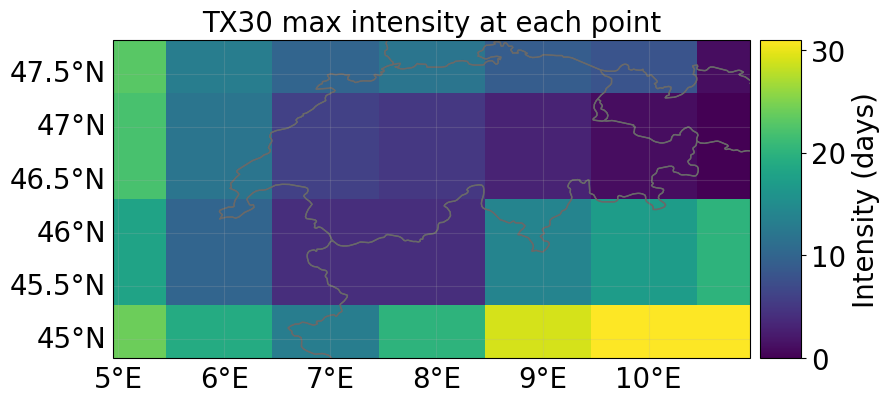

In [ ]:
# load an example hazard
initiation_month_str = f"{month_name_to_number(initiation_month[0]):02d}"
forecast_month_str = f"{handler.valid_period_str[-2:]}"  # Last month in valid period
forecast_year =  year_list[0]
if int(initiation_month_str) > int(forecast_month_str):
    forecast_year += 1  # Forecast extends to the next year

# Load the hazard and plot intensity for the selected grid, maximized over ensemble
path_to_hazard = handler.get_pipeline_path(forecast_year, initiation_month_str, "hazard")
haz = Hazard.from_hdf5(path_to_hazard)

if haz:
    available_dates = sorted(set(haz.date))  # Remove duplicates and sort
    readable_dates = [dt.datetime.fromordinal(d).strftime('%Y-%m-%d') for d in available_dates] # Convert ordinal dates to ISO 8601 date format (YYYY-MM-DD)
    print("Available Dates Across Members:", readable_dates)  # Print only unique dates

    # Find the closest date in the dataset
    target_date = dt.datetime(forecast_year, int(forecast_month_str), 1).toordinal()
    closest_date = min(available_dates, key=lambda x: abs(x - target_date))
    closest_date_str = dt.datetime.fromordinal(closest_date).strftime('%Y-%m-%d')

    # Plot intensity for the selected event
    print(f"Selected Date for Plotting: {closest_date_str}")
    haz.select(date=[closest_date, closest_date]).plot_intensity(event=0, smooth=False)
else:
    print("No hazard data found for the selected period.")